# Foundations of Data Mining: Assignment 1

J.E. van de Broek, 0864991 <br>
J.W.A. Mangnus, 0721908

In [7]:
%matplotlib inline
from preamble import *
from IPython.display import Image
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

## Handwritten digit recognition (5 points, 1+2+2)

In [2]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = 'fa31aae3ceb0dba388acb20276cd75d3'

Class label: 5


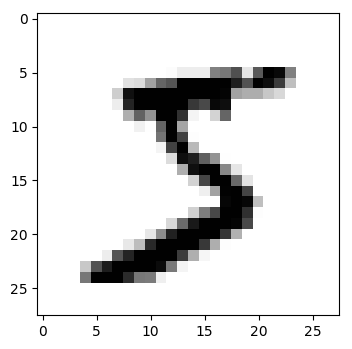

In [33]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
# Get the predictors X and the labels y
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); 
# Take the first example, reshape to a 28x28 image and plot
plt.imshow(X[0].reshape(28, 28), cmap=plt.cm.gray_r) 
print("Class label:",y[0]) # Print the correct class label

- Evaluate a k-Nearest Neighbor classifier with its default settings.
    - Use the first 60,000 examples as the training set and the last 10,000 as the test set
    - What is the predictive accuracy?
    - Find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify?


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

Predictive Score over Test Set: 0.97


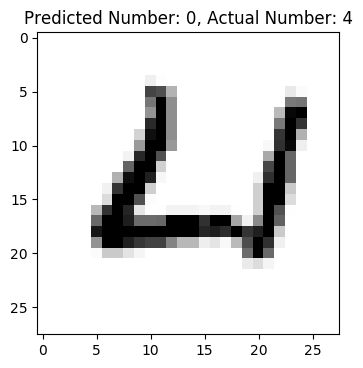

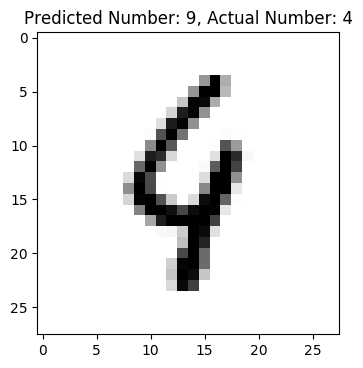

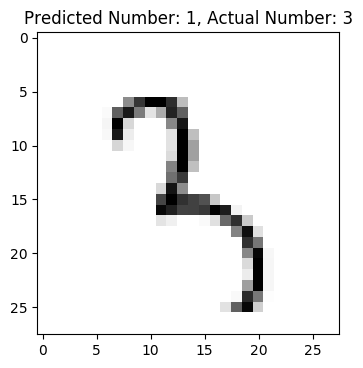

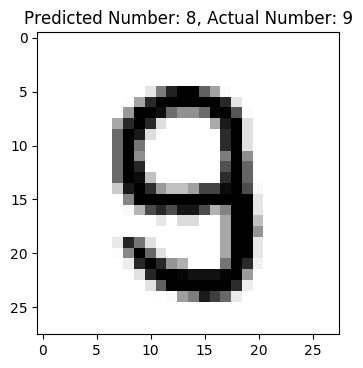

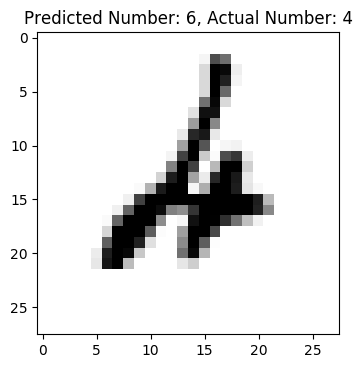

In [34]:
import openml as oml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

xTrain, xTest = np.split(X,[60000])
yTrain, yTest = np.split(y,[60000])

xReduced, _, yReduced,_ = train_test_split(X,y, stratify=y, train_size=0.1)
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(xTrain, yTrain)

count = 0
print("Predictive Score over Test Set: %.2f"%(knn.score(xTest,yTest)) )
for i in range(0,10000):
    pred = knn.predict(xTest[i].reshape(1,-1))
    if(pred != yTest[i]) and count < 5:
        plt.imshow(xTest[i].reshape(28, 28), cmap=plt.cm.gray_r)
        plt.title("Predicted Number: " + str(pred[0]) + ", Actual Number: " + str(yTest[i]))
        count += 1
        plt.show()
    elif count >= 5:
        break
    else:
        continue

The images that the classifier misclassifies can pretty easily be confused. Many of the images could be interpreted in both the predicted way and the actual label by humans.

- Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data
    - Use 10-fold crossvalidation and plot $k$ against the misclassification rate. Which value of $k$ should you pick?

Calculating with k=1
Calculating with k=2
Calculating with k=3
Calculating with k=4
Calculating with k=5
Calculating with k=6
Calculating with k=7
Calculating with k=8
Calculating with k=9
Calculating with k=10
Calculating with k=11
Calculating with k=12
Calculating with k=13
Calculating with k=14
Calculating with k=15
Calculating with k=16
Calculating with k=17
Calculating with k=18
Calculating with k=19
Calculating with k=20
Calculating with k=21
Calculating with k=22
Calculating with k=23
Calculating with k=24
Calculating with k=25
Calculating with k=26
Calculating with k=27
Calculating with k=28
Calculating with k=29
Calculating with k=30
Calculating with k=31
Calculating with k=32
Calculating with k=33
Calculating with k=34
Calculating with k=35
Calculating with k=36
Calculating with k=37
Calculating with k=38
Calculating with k=39
Calculating with k=40
Calculating with k=41
Calculating with k=42
Calculating with k=43
Calculating with k=44
Calculating with k=45
Calculating with k=

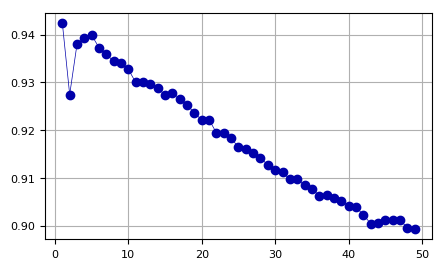

In [13]:
from sklearn.model_selection import cross_val_score


scores = []
knn = KNeighborsClassifier(n_jobs=-1)
for k in range(1,50):
    knn.n_neighbors=k
    print("Calculating with k="+str(k))
    scores.append(np.mean(cross_val_score(knn, xReduced, yReduced, cv=10)))
x = range(1,50)
plt.plot(x, scores, marker="o")
plt.grid()
plt.show()

From this image, we can clearly see that $k=1$ delivers the best score. 

- Do the same but with 100 bootstrapping repeats. Are the results different? Explain.

In [ ]:
from sklearn.model_selection import ShuffleSplit

scores = []
knn = KNeighborsClassifier(n_jobs=-1)
for k in range(1,50):
    knn.n_neighbors=k
    print("Calculating with k="+str(k))
    supSplit = ShuffleSplit(train_size=0.66, test_size=0.34, n_splits=100)
    mean = np.mean((cross_val_score(knn, xReduced, yReduced, cv=supSplit,n_jobs=-1)))
    scores.append(mean)
x = range(1,50)        
plt.plot(x, scores, marker="o")
plt.grid()
plt.show()

Calculating with k=1


Running this code takes quite some time, so an image of the result is included below. This image (KNN Bootstrapping) also shows that $k=1$ offers the best result. However the values of these scores are a lot lower than the cross validation results. This is probably through the fact that we have a smaller training set than in the Cross Validation and this has a significant impact on the performance of the Nearest Neighbor model. 

![Bootstrapping Results](Images/KNN Bootstrapping.png)


- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report is the optimal performance. Can you get better results than kNN?
    
Report all results clearly and interpret the results. 


In [35]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logReg = LogisticRegression()
SVC =  LinearSVC()
for C, pen in [(x,y) for x in [0.0001, 0.001, 0.01, 0.1, 1] for y in ['l1','l2']]:
    logReg = LogisticRegression(C=C, penalty=pen, n_jobs=-1)
    if(pen=='l1'):
        SVC = LinearSVC(C=C, penalty=pen, dual=False)
    else:
        SVC = LinearSVC(C=C, penalty=pen)
    print("Logistic Regression Score (C: " + str(C) + ", pen: " + pen + "): %.4f"%(np.mean(cross_val_score(logReg, xReduced, yReduced, cv=10))))
    print("Linear SVC Score(C: " + str(C) + ", pen: " + pen + "): %.4f"%(np.mean(cross_val_score(SVC, xReduced, yReduced, cv=10))))

Logistic Regression Score (C: 0.0001, pen: l1): 0.8369
Linear SVC Score(C: 0.0001, pen: l1): 0.8767
Logistic Regression Score (C: 0.0001, pen: l2): 0.8831
Linear SVC Score(C: 0.0001, pen: l2): 0.8567
Logistic Regression Score (C: 0.001, pen: l1): 0.8937
Linear SVC Score(C: 0.001, pen: l1): 0.8933
Logistic Regression Score (C: 0.001, pen: l2): 0.8648
Linear SVC Score(C: 0.001, pen: l2): 0.8471
Logistic Regression Score (C: 0.01, pen: l1): 0.8886
Linear SVC Score(C: 0.01, pen: l1): 0.8666
Logistic Regression Score (C: 0.01, pen: l2): 0.8529
Linear SVC Score(C: 0.01, pen: l2): 0.8431
Logistic Regression Score (C: 0.1, pen: l1): 0.8627
Linear SVC Score(C: 0.1, pen: l1): 0.8513
Logistic Regression Score (C: 0.1, pen: l2): 0.8367
Linear SVC Score(C: 0.1, pen: l2): 0.8434
Logistic Regression Score (C: 1, pen: l1): 0.8417
Linear SVC Score(C: 1, pen: l1): 0.8443
Logistic Regression Score (C: 1, pen: l2): 0.8213
Linear SVC Score(C: 1, pen: l2): 0.8465


The best score is retrieved using a $C$ of 0.001 and a L1 penalty. It seems that the data can be classified best through a relatively simple model, due to the low value of $C$ and the use of an L1 penalty. However it seems that these linear models cannot beat a 1-Nearest Neighbor classifier. The score of 0.89 is significantly lower than the score of 0.94 for the 1-Nearest Neighbor classifier. This seems to imply that this handwriting data works better with a nearest neighbor classifier than through a linear model

## Model selection (4 points (2+2))
Study how RandomForest hyperparameters interact on the Ionosphere dataset (OpenML ID 59).

- Optimize a RandomForest, varying both $n\_estimators$ and $max\_features$ at the same time. Use a nested cross-validation and a grid search (or random search) over the possible values, and measure the AUC. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal AUC performance you find?
- Again, vary both hyperparameters, but this time use a grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow AUC$ with AUC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

Hint: Running this experiment can take a while, so start early and use a feasible grid/random search. Start with a coarse grid or few random search iterations.  
Hint: Use a log scale (1,2,4,8,16,...,512) for $n\_estimators$. Vary $max\_features$ linearly between 1 and the total number of features. Note that, if you give $max\_features$ a float value, it will use it as [the percentage of the total number of features](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Hence, you can explore the values [0.1,0.2,0.3,...,0.9]  
Hint: We've shown how to do a nested cross-validation in class. You can also pass the evaluation measure to ```cross_val_score``` using the ```scoring``` attribute.
Hint: Note that in the first question, we are not interested in the actual values of the optimal hyperparameters, only in their AUC performance. Indeed, you will possibly get different optimal hyperparameters in each iteration of the outer CV. In the second question, we do a single grid search, and hence we can retrieve and visualize the hyperparameter values and their performance.


In [29]:
import openml as oml
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
oml.config.apikey = 'fa31aae3ceb0dba388acb20276cd75d3'
from sklearn.cross_validation import cross_val_score
from sklearn.metrics.scorer import SCORERS
import matplotlib as plt
import pandas as pd
import IPython
import mglearn
import warnings
warnings.filterwarnings('ignore')

ionosphere = oml.datasets.get_dataset(59) # Download MNIST data
X, y = ionosphere.get_data(target=ionosphere.default_target_attribute); # Get the predictors X and the labels y


In [30]:
#The max features are in percentages of the total, which is 34.
param_grid = {'n_estimators': [1,2,4,8,16,32,64,128,256,512],
              'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, y)
print('Non nested CV score:', grid_search.best_score_)
print("Best parameters: ", grid_search.best_params_)
nested_scores = cross_val_score(grid_search,X,y, cv=5, scoring='roc_auc', n_jobs=-1)
print("Nested CV scores: {}".format(nested_scores.mean()))

Parameter grid:
{'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

Non nested CV score: 0.977245963913
Best parameters:  {'max_features': 0.1, 'n_estimators': 512}
Nested CV scores: 0.9750222222222222


In the above section we optimized a Random Forest varying both $n\_estimators$ and $max\_features$ using a nested cross-validation and a grid search, measuring the AUC (Area under curve). The parameters that give the best result for the AUC are {'max_features': 0.1, 'n_estimators': 64}, which means 10 percent of the max_features and 64 estimators. The nested CV score is a little better than the non-nested CV score, but the difference is minimal and we can conclude that the score is good since the optimal AUC is 0.976 and this is rather high. The next challenge is to make a heatmap of all values, and not only presenting the optimal one.

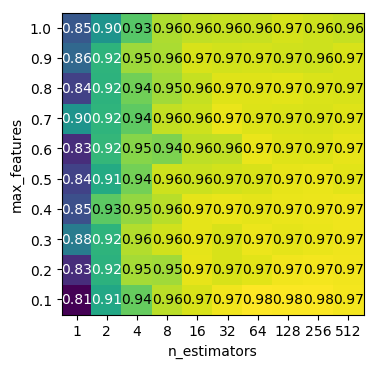

In [7]:
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
scores = np.array(results.mean_test_score).reshape(10, 10)
#print("Scores grid:\n{}".format(scores))
# plot the mean cross-validation scores
hm = mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'],
                      ylabel='max_features', yticklabels=param_grid['max_features'], cmap="viridis")

The heatmap generated for this exercise shows some interesting elements. Firstly one can see that the amount of estimators has a much greater impact on the AUC than the amount of features, especially for a low amount of estimators. The AUC score for an amount of estimators is on average around 0.97 for 16 estimators or more. The reason that 64 estimators gives the optimal AUC is a therefore probably a coincidence and it could have been somewhere between 16 and 512 in another run. The same counts a bit for the $max\_features$ parameter, but nevertheless the heatmap looks nice. From this exercise it was clear that the results are very accurate, but the running time of the algorithm is quite long. For a rather small dataset this creates no large issues, but when dealing with big data it will probably take too long. This is a measure that should be taken into account when comparing algorithms. 

## Decision tree heuristics (1 point)
Consider the toy training set created below. It predicts whether your date agrees to go out with you depending on the weather.

Learn a decision tree:

- Implement functions to calculate entropy and information gain

In [11]:
df = pd.DataFrame({"Sky":['sunny','sunny','rainy','sunny','sunny'],
                   "AirTemp":['warm','warm','warm','cold','warm'],
                   "Humidity":['normal','high','high','high','normal'],
                   "Wind":['strong','strong','strong','strong','weak'],
                   "Water":['warm','warm','cool','warm','warm'],
                   "Forecast":['same','same','change','change','same'],
                   "Date?":['yes','yes','no','yes','no']
                   });
# Fix column ordering
df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']] 
df # print

,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,warm,high,strong,cool,change,no
3,sunny,cold,high,strong,warm,change,yes
4,sunny,warm,normal,weak,warm,same,no


In [12]:
# Complete these functions first
# pos and neg are the number of positive and negative samples in a node
def entropy(pos, neg):
    if pos == 0 or neg==0:
        return 0
    p = pos / (pos + neg)
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

# pos1 and pos2 are the number of positive examples in each branch after the split. 
# Same for neg1 and neg2 
def info_gain(pos1,neg1,pos2,neg2):
    total = pos1 + pos2 + neg1 + neg2
    return entropy(pos1+pos2, neg1+neg2) - entropy(pos1, neg1) * (pos1+neg1)/total - entropy(pos2,neg2) * (pos2+neg2)/total

- What is the class entropy for the entire dataset? What is the information gain when you split the data using the *Water* feature?

In [13]:
pos1 = df[df['Date?'] == 'yes']
neg1 = df[df['Date?'] == 'no']
warm = df[df['Water'] == 'warm']
cool = df[df['Water'] == 'cool']
warmP = warm[warm['Date?']=='yes']
warmN = warm[warm['Date?']=='no']
coolP = cool[cool['Date?']=='yes']
coolN = cool[cool['Date?']=='no']
print('Entropy: ' + str(entropy(len(pos1), len(neg1))))
print('Info gain on Water split: ' + str(info_gain(len(warmP), len(warmN), len(coolP), len(coolN))))

Entropy: 0.970950594455
Info gain on Water split: 0.321928094887


- Implement a basic decision tree:
    - Select a feature to split on according to its information gain. If multiple features are equally good, select the leftmost one.
    - Split the data and repeat until the tree is complete.
    - Print out the results (nodes and splits).

In [19]:
def determineOccurences(df):
    occ = []
    i=0
    for k in df.columns:
        occ.append([])
        res = []
        n=0
        for j in df[k].values:
            occ[i].extend([0,0,0,0])
            if j in res:
                if df['Date?'][df.index[n]] == 'yes':
                    occ[i][res.index(j) * 2] +=1
                else:
                    occ[i][res.index(j) * 2 + 1] +=1
            else:
                res.append(j)
                if df['Date?'][df.index[n]] == 'yes':
                    occ[i][len(res)-1 * 2] +=1
                else:
                    occ[i][(len(res) - 1) * 2 + 1] += 1
            n+=1
        i+=1
    return occ

def buildTree(df, z):
    occ = determineOccurences(df)
    result = ''
    infGain = []
    for i in occ:
        infGain.append(info_gain(i[0],i[1],i[2],i[3]))
    infGain[len(infGain)-1] = 0
    if len(df['Date?'].unique()) != 1:
        toSplit = infGain.index(np.max(infGain))
        result = "Split on " + df.columns[toSplit]
        uniq = df[df.columns[toSplit]].unique()
        for i in uniq:
            r = buildTree(df[df[df.columns[toSplit]] == i], z+1)
            result += '\n ' + '\t ' * (z-1) + 'If ' + df.columns[toSplit] + ' is ' + i
            if r:
                result += ' \n' + ' \t ' * z + r
    else:
        result = 'Date==' + str(df['Date?'].unique())
    return result

print(buildTree(df, 1))

Split on Sky
 If Sky is sunny 
 	 Split on Wind
 	 If Wind is strong 
 	  	 Date==['yes']
 	 If Wind is weak 
 	  	 Date==['no']
 If Sky is rainy 
 	 Date==['no']


- Now train a scikit-learn decision tree on the same data. Do you get the same result? Explain.

In [14]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dtc = DecisionTreeClassifier()
y = df['Date?']
y = [1 if p == 'yes' else 0 for p in y]

df = df.drop(['Date?'], axis=1)
dummies = pd.get_dummies(df)
_= dtc.fit(dummies, y)
export_graphviz(dtc, out_file="tree.dot",feature_names=dummies.keys())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

This results in the following tree:

![Decision Tree](Images/Decision Tree.png)

This is the same tree as the one our own method generates. It seems the scikit-learn decision tree classifier uses a similar or the same method to determine what the best split is. 

## Random Forests (4 points (1+1+2))
Study the effect of the number of trees in a RandomForest on the EEG-eye-state dataset (http://www.openml.org/d/1471). This dataset measures brain activity using 15 sensors, and you need to predict whether the person's eyes are open or closed. 

* Train a RandomForest classifier on this dataset with an increasing number of trees (on a log scale as above). Plot the Out-Of-Bag error against the number of trees.
    - The Out-Of-Bag error is the test error obtained when using bootstrapping, and using the non-drawn data points as the test set. This is what a RandomForest does internally, so you can retrieve it from the classifier. The code below hints on how to do this.

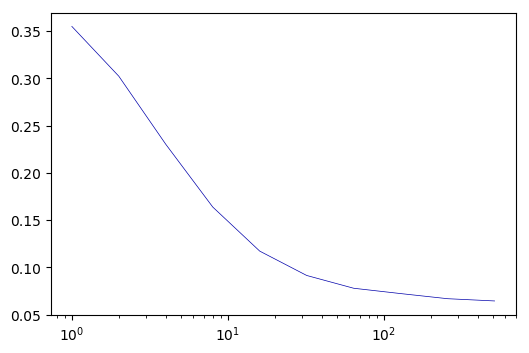

In [24]:
oml.config.apikey = 'fa31aae3ceb0dba388acb20276cd75d3'
eeg = oml.datasets.get_dataset(1471)
X, y = eeg.get_data(target=eeg.default_target_attribute)

# Out of bag errors can be retrieved from the RandomForest classifier. 
# You'll need to loop over the number of trees.
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
from sklearn import ensemble

errors = []
xTrain,xTest,yTrain,yTest = train_test_split(X,y, test_size=.1, random_state=0)

scale = [2 ** i for i in range(0,10)]
for est in scale:
    clf = ensemble.RandomForestClassifier(n_estimators=int(est), n_jobs=-1, oob_score=True, random_state=0)
    _ = clf.fit(xTrain, yTrain);
    error = (1-clf.oob_score_)
    errors.append(error)
plt.plot(scale, errors)
plt.xscale('log')
plt.show()

* Construct the same plot, but now use 10-fold Cross-validation and error rate instead of the OOB error. Compare the two. What do you learn from this?

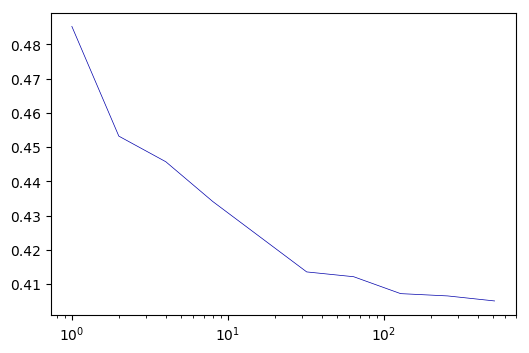

In [25]:
errors = []
for est in scale:
    clf = ensemble.RandomForestClassifier(n_estimators=int(est), n_jobs=-1, oob_score=True, random_state=0)
    errors.append(1-np.mean(cross_val_score(clf,X, y, cv=10)))
plt.plot(scale, errors)
plt.xscale('log')
plt.show()

The error rate received from 10-fold Cross Validation is much higher than the Out-Of-Bag error. From the OOB error, we know that the model already does not work perfectly on the training data so we can expect an error rate that is at least as high as the OOB error. What is not directly to be expected is that this error remains pretty high when we increase the number of estimators. When we have 512 estimators, we have a OOB error of around 0.07 and an error rate of around 0.41. 

* Compare the performance of the RandomForest ensemble with that of a single full decision tree. Compute the AUC as well as the bias and variance. Does the bias and variance increase/decrease for the ensemble? Does the number of trees affect the result?

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import ShuffleSplit

def calcBiasVariance(clf):
    # Bootstraps
    n_repeat = 100
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        clf.fit(X[train_index], y[train_index])
        y_pred = clf.predict(X[test_index])

        # Store predictions
        for i, index in enumerate(test_index):
            y_all_pred[index].append(y_pred[i])

    # Compute bias, variance, error
    bias_sq = sum([(1 - x.count(y[i]) / len(x)) ** 2 * len(x) / n_repeat
                   for i, x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0) / len(x)) ** 2 + (x.count(1) / len(x)) ** 2)) / 2) * len(x) / n_repeat
               for i, x in enumerate(y_all_pred)])
    error = sum([(1 - x.count(y[i]) / len(x)) * len(x) / n_repeat
                 for i, x in enumerate(y_all_pred)])
    return bias_sq, var, error

errors = []
dtc = DecisionTreeClassifier(random_state=0)
_=dtc.fit(xTrain,yTrain)
tree_auc = roc_auc_score(yTest, dtc.predict(xTest))
val = calcBiasVariance(dtc)

print("For Decision Tree, Total Bias Squared: %.2f, Total Variance: %.2f, AUC %.2f"%(val[0], val[1], tree_auc))
for est in scale:
    clf = ensemble.RandomForestClassifier(n_estimators=int(est), n_jobs=-1, oob_score=True, random_state=0)
    _ =clf.fit(xTrain, yTrain)
    
    vals = calcBiasVariance(clf)

    for_auc = roc_auc_score(yTest, clf.predict(xTest))

    print("For %.0f estimators and Random Forest, Total Bias Squared: %.2f, Total Variance: %.2f, AUC: %.2f"%(est, vals[0], vals[1], for_auc))

For Decision Tree, Total Bias Squared: 325.04, Total Variance: 532.74, AUC 0.83
For 1 estimators and Random Forest, Total Bias Squared: 379.61, Total Variance: 676.57, AUC: 0.88
For 2 estimators and Random Forest, Total Bias Squared: 522.60, Total Variance: 511.41, AUC: 0.86
For 4 estimators and Random Forest, Total Bias Squared: 365.15, Total Variance: 399.48, AUC: 0.92
For 8 estimators and Random Forest, Total Bias Squared: 296.83, Total Variance: 291.75, AUC: 0.95
For 16 estimators and Random Forest, Total Bias Squared: 274.35, Total Variance: 210.37, AUC: 0.96
For 32 estimators and Random Forest, Total Bias Squared: 266.51, Total Variance: 154.09, AUC: 0.97
For 64 estimators and Random Forest, Total Bias Squared: 272.10, Total Variance: 117.50, AUC: 0.97
For 128 estimators and Random Forest, Total Bias Squared: 278.52, Total Variance: 95.20, AUC: 0.96
For 256 estimators and Random Forest, Total Bias Squared: 282.50, Total Variance: 82.39, AUC: 0.97
For 512 estimators and Random For

As can be seen in the results, bias and variance decrease once we increase the number of estimators for the random forest classifier until a certain point. A random forest classifier with 1 estimator is overal more biased and has more variance, but does have a higher Area-Under-Curve. 

As is to be expected more estimators results in a less biased and varied result set and in a higher Area-Under-Curve value. However more estimators also means more computation and thus one can directly notice an impact in performance when using a random forest classifier with a high amount of estimators

## A regression benchmark (1 point)
Consider the liver-disorder dataset (http://www.openml.org/d/8). The goal is to predict how much alcohol someone consumed based on blood test values.

- Take a selection of the algorithms that we covered in class that can do regression.
- Based on what you learned in the previous exercises, make educated guesses about good hyperparameter values and set up a grid or random search.
- Evaluate all models with 10-fold cross-validation and root mean squared error (RMSE). Report all results. Which model yields the best results?

Hint: nagmean squared error (MSE) is a standard scoring technique in ```GridSearchCV``` and ```cross_val_score```. You'll have to compute the square roots yourself. Of course, during a grid search you can just use MSE, the optimal hyperparameter values will be the same.

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn import metrics
import openml as oml
import numpy as np
oml.config.apikey = 'fa31aae3ceb0dba388acb20276cd75d3'

import warnings
warnings.filterwarnings('ignore')

liver = oml.datasets.get_dataset(8) # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute);
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

LogReg = LogisticRegression(n_jobs=-1)
param_grid_log = {"C": [0.0001,0.001,0.01,0.1,1,10,100,1000], "penalty": ['l1','l2']}
grid_log = GridSearchCV(LogReg, param_grid=param_grid_log, cv=10, scoring='mean_squared_error')
grid_log.fit(X_train,y_train)
rmse = metrics.mean_squared_error(grid_log.predict(X_test), y_test) ** (0.5)
log_params = grid_log.best_params_
print("Root mean squared error of Logistic Regression: ", rmse)
print("Optimal parameters: ", log_params)

Root mean squared error of Logistic Regression:  3.80864111284
Optimal parameters:  {'C': 10, 'penalty': 'l1'}


In [4]:
RfReg = RandomForestRegressor(n_jobs=-1)
param_grid_rf = {"n_estimators": [1,4,9,16,25,36,49,64,81,100], "max_features": [0.1,0.3,0.5,0.7,0.9]}
grid_rf = GridSearchCV(RfReg, param_grid=param_grid_rf, cv=10, scoring='mean_squared_error')
grid_rf.fit(X_train,y_train)
rmse = metrics.mean_squared_error(grid_rf.predict(X_test), y_test) ** (0.5)
rf_params = grid_rf.best_params_
print("Root mean squared error of Random Forest Regression Score: ", rmse)
print("Optimal parameters: ", rf_params)


Root mean squared error of Random Forest Regression Score:  3.31103578569
Optimal parameters:  {'max_features': 0.3, 'n_estimators': 16}


In [5]:
GbReg = GradientBoostingRegressor()
param_grid_gb = {"n_estimators": [1,4,9,16,25,36,49,64,81,100], "max_depth": [1,2,4,6,8,10]}
grid_gb = GridSearchCV(GbReg, param_grid=param_grid_gb,cv=10, scoring='mean_squared_error')
grid_gb.fit(X_train,y_train)
rmse = metrics.mean_squared_error(grid_gb.predict(X_test), y_test) ** (0.5)
gb_params = grid_gb.best_params_
print("Root mean squared error of Gradient Boosting Regression Score: ", rmse)
print("Optimal parameters: ", gb_params)

Root mean squared error of Gradient Boosting Regression Score:  3.15638649032
Optimal parameters:  {'max_depth': 2, 'n_estimators': 64}


In [6]:
DtReg = DecisionTreeRegressor()
param_grid_dt = {"max_features": [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
grid_dt = GridSearchCV(DtReg, param_grid=param_grid_dt, cv=10, scoring='mean_squared_error')
grid_dt.fit(X_train,y_train)
rmse = metrics.mean_squared_error(grid_dt.predict(X_test), y_test) ** (0.5)
dt_params = grid_dt.best_params_
print("Root mean squared error of Decision Tree Regression Score: ", rmse)
print("Optimal parameters: ", dt_params)

Root mean squared error of Decision Tree Regression Score:  4.35889894354
Optimal parameters:  {'max_features': 0.7}


In [7]:
LSVReg = LinearSVR()
param_grid_lsv = {"C": [0.0001,0.001,0.01,0.1,1,10,100,1000], "loss": ['l1','l2']}
print('parameter grid: ', param_grid_lsv)
grid_lsv = GridSearchCV(LSVReg, param_grid=param_grid_lsv, cv=10, scoring='mean_squared_error')
grid_lsv.fit(X_train,y_train)
rmse = metrics.mean_squared_error(grid_lsv.predict(X_test), y_test) ** (0.5)
lsv_params = grid_lsv.best_params_
print("Root mean squared error of Linear Support Vector Regression Score: ", rmse)
print("Optimal parameters: ", lsv_params)

parameter grid:  {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'loss': ['l1', 'l2']}
Root mean squared error of Linear Support Vector Regression Score:  3.13967466994
Optimal parameters:  {'C': 0.0001, 'loss': 'l2'}


We considered the liver-disorder dataset and took a selection of regression algorithms to perform on the data. The regression algorithms we chose were the Logistic Regressor, Random Forest Regressor, Gradient Boosting Regressor, Decision Tree Regressor, Linear Support Vector Regressor. For all regressors the best parameters regarding the mean squared error were searched using grid search and cross validation. The results are below the code blocks. The algorithms performing best were the Linear Support Vector Regressor with parameters {'C': 0.0001, 'loss': 'l2'} and the Gradient Boosting Regressor, with parameters {'max_depth': 2, 'n_estimators': 64}. The root mean squared errors were respectively 3.140 and 3.156, so the difference is minimal and we can not really conclude one is better than the other.